# Assignment 2
## 1. Properties of CNNs
### Question 1.2 (a)

In this first part, we will train a CNN model over the dataset CIFAR-10. This dataset contains 10 classes: plane, car, bird, cat, deer, dog, frog, horse, ship and truck. 

First, let's load the data:

In [3]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

/opt/anaconda3/envs/dl2025/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/dl2025/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <063DD42B-A1DA-3BBE-AD5E-03C12F7E3DBA> /opt/anaconda3/envs/dl2025/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/dl2025/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/dl2025/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/dl2025/lib/python3.12/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/dl2025/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` 

In [4]:
# Import data from CIFAR-10
# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),])

# Load CIFAR-10 dataset
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Create a function to display the first 25 images of a dataset with their corresponding class name and use it over `train_data`. 

Hint: `class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]`, where the labels are the corresponding index. 
   

In [5]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    device = torch.device("mps")

In [6]:
def display_first_few_images(data):
    #######################
    # PUT YOUR CODE HERE  #
    #######################
	class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
	fig, axes = plt.subplots(5, 5, figsize=(15, 15))
	for i in range(25):
		img, label = data[i]
		ax = axes[i // 5, i % 5]
		ax.imshow(img.permute(1, 2, 0))
		ax.set_title(class_names[label])
		ax.axis('off')		
	plt.show()
	
		
    #######################
    # END OF YOUR CODE    #
    #######################

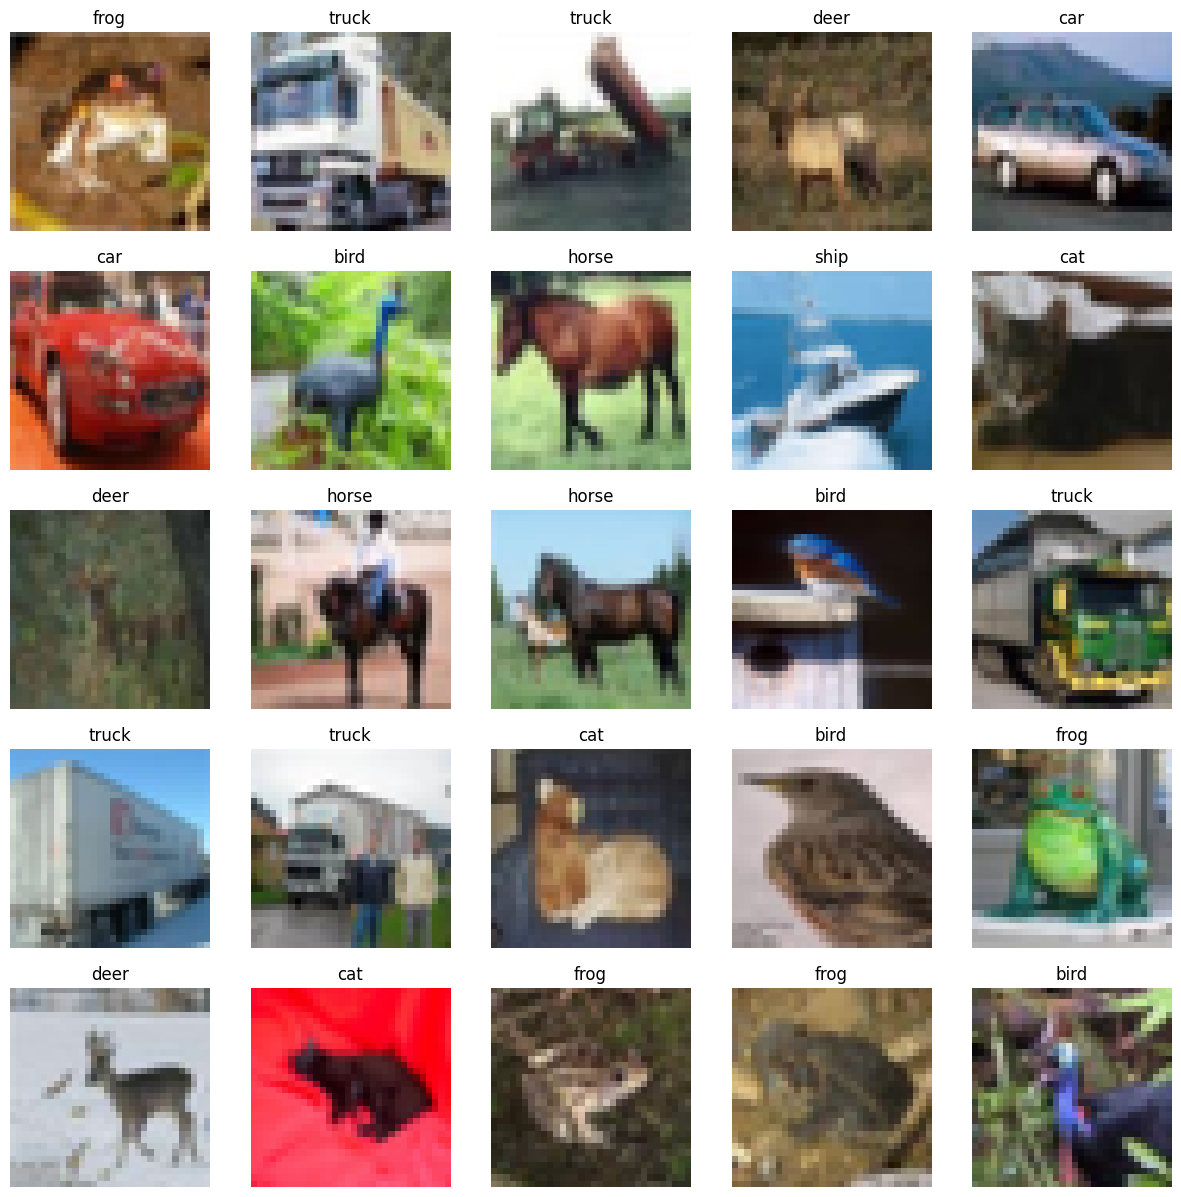

In [7]:
display_first_few_images(train_data)

Now, we will load and train a small CNN model! In the following cells you can check the architecture of the model and the designed function for its training.

Note: You shouldn't need Snellius to run it. Either Google Collab or your local computer should be enough.

In [8]:
# Define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function for training the model
def train(model, train_loader, epochs = 10):
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

In [9]:
# Initialize the model 
model = CNN().to(device)

# Train the model
train(model, train_loader)

100%|██████████| 782/782 [00:11<00:00, 65.79it/s]


Epoch 1, Loss: 1.5998


100%|██████████| 782/782 [00:11<00:00, 70.10it/s]


Epoch 2, Loss: 1.2480


100%|██████████| 782/782 [00:12<00:00, 61.40it/s]


Epoch 3, Loss: 1.0857


100%|██████████| 782/782 [00:12<00:00, 64.45it/s]


Epoch 4, Loss: 0.9604


100%|██████████| 782/782 [00:11<00:00, 70.66it/s]


Epoch 5, Loss: 0.8750


100%|██████████| 782/782 [00:10<00:00, 73.03it/s]


Epoch 6, Loss: 0.8122


100%|██████████| 782/782 [00:10<00:00, 75.16it/s]


Epoch 7, Loss: 0.7554


100%|██████████| 782/782 [00:10<00:00, 72.39it/s]


Epoch 8, Loss: 0.7071


100%|██████████| 782/782 [00:12<00:00, 60.64it/s]


Epoch 9, Loss: 0.6674


100%|██████████| 782/782 [00:10<00:00, 76.15it/s]

Epoch 10, Loss: 0.6306


Now, we want to check the performance of the trained model for the test dataset when rotating the images 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330 and 360 degrees.

For this, you need to first create the function `get_acc_per_angle` that computes the accuracies_per_angle for a given model. You should create a `rotated_test_data` and a `rotated_test_loader`, from which taking the images and labels to give as input to the `inference` function that is provided to you in the following cell. 

Then, create a `plot` function that plots the accuracy of the model per angle of rotation of the images.   

Hint: Check how we used transformations in section a.

In [10]:
def inference(model, images, labels):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    return predictions

In [11]:
def get_acc_per_angle(model):
    angles = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
    angle_accuracies = []
    with torch.no_grad():
        #######################
    	# PUT YOUR CODE HERE  #
        #######################
        for angle in angles:
            rotated_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Lambda(lambda x: transforms.functional.rotate(x, angle)),
            ])
            rotated_test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=rotated_transform)
            rotated_test_loader = torch.utils.data.DataLoader(rotated_test_data, batch_size=64, shuffle=False)
            correct = 0
            total = 0
            for images, labels in rotated_test_loader:
                predictions = inference(model, images, labels)
                total += labels.size(0)
                correct += (predictions == labels.to(device)).sum().item()
                accuracy = 100 * correct / total
            angle_accuracies.append(accuracy)

            #######################
            # END OF YOUR CODE    #
            #######################
    return angles, angle_accuracies          

In [12]:
angles, angle_accuracies = get_acc_per_angle(model)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [13]:
# Plot accuracy vs rotation angle
def plot(angles, angle_accuracies):
            #######################
            # PUT YOUR CODE HERE  #
            #######################    
    plt.figure(figsize=(10, 6))
    plt.plot(angles, angle_accuracies, marker='o')
    plt.title('Model Accuracy vs Rotation Angle')
    plt.xlabel('Rotation Angle (degrees)')
    plt.ylabel('Accuracy (%)')
    plt.grid()
    plt.show()

            #######################
            # END OF YOUR CODE    #
            #######################

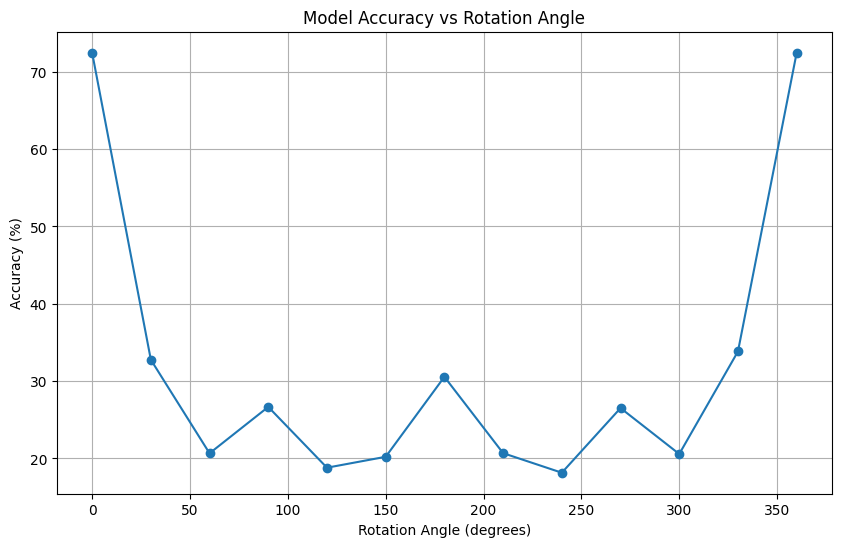

In [14]:
plot(angles,angle_accuracies)

### Question 1.2 (b)

As said in the pdf, now we will first train a model with the same architecture as the previous one (this is, you can use the same to initialize the model as before), changing the train dataset so that it contains _random rotations_ of angles of up to 360 degrees. For this, create a new `train_augmentation_transform` to create the train augmented dataset.

Hint: Check how we used transformations in Question 1.2 (a)

Files already downloaded and verified


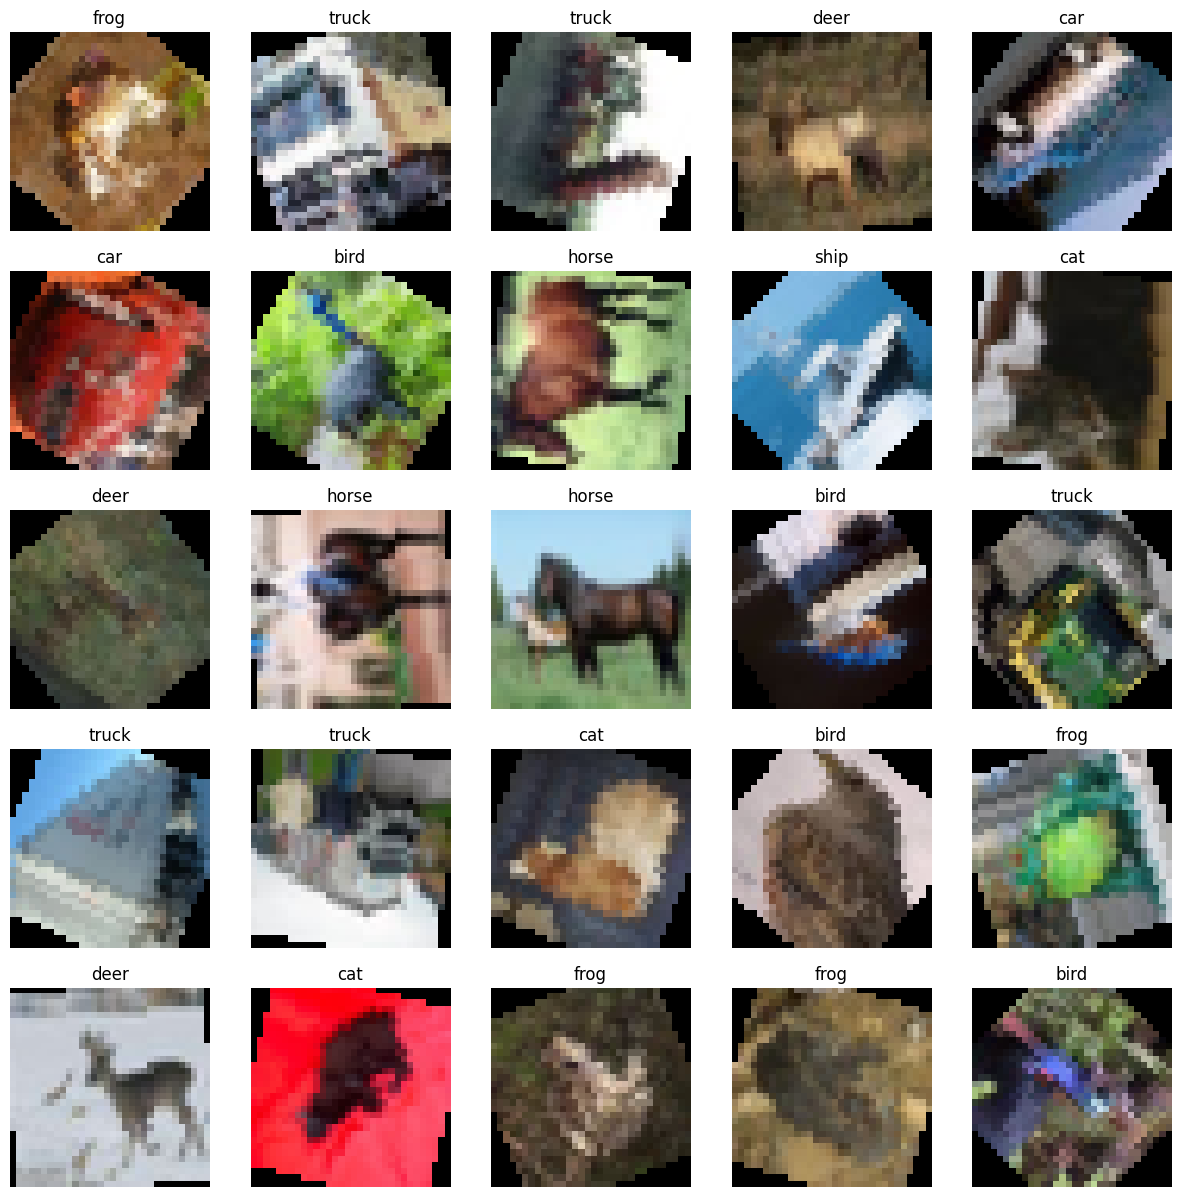

In [15]:
# Create the new train data and loader and visualize it

#######################
# PUT YOUR CODE HERE  #
#######################
train_augmentation_transform = transforms.Compose([
    transforms.RandomRotation(degrees=(0,360)),
    transforms.ToTensor()
])
#######################
# END OF YOUR CODE    #
#######################

train_augmented_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_augmentation_transform)
train_augmented_loader = torch.utils.data.DataLoader(train_augmented_data, batch_size=64, shuffle=True)


display_first_few_images(train_augmented_data)

As said, we will now initialize the new model and train it over the `train_augmented_loader` you just created. Initialized the new model as we did in the previous question and train it using the `train` function. 

Note: Again, you shouldn't need Snellius to run it 

In [16]:
#######################
# PUT YOUR CODE HERE  #
#######################
rot_inv_model = CNN().to(device)
train(rot_inv_model, train_augmented_loader)


#######################
# END OF YOUR CODE    #
#######################

100%|██████████| 782/782 [00:11<00:00, 67.92it/s]


Epoch 1, Loss: 1.9133


100%|██████████| 782/782 [00:10<00:00, 74.60it/s]


Epoch 2, Loss: 1.6572


100%|██████████| 782/782 [00:10<00:00, 76.20it/s]


Epoch 3, Loss: 1.5713


100%|██████████| 782/782 [00:10<00:00, 76.45it/s]


Epoch 4, Loss: 1.5064


100%|██████████| 782/782 [00:10<00:00, 73.91it/s]


Epoch 5, Loss: 1.4612


100%|██████████| 782/782 [00:10<00:00, 73.65it/s]


Epoch 6, Loss: 1.4205


100%|██████████| 782/782 [00:10<00:00, 77.08it/s]


Epoch 7, Loss: 1.3841


100%|██████████| 782/782 [00:10<00:00, 74.17it/s]


Epoch 8, Loss: 1.3580


100%|██████████| 782/782 [00:10<00:00, 74.30it/s]


Epoch 9, Loss: 1.3329


100%|██████████| 782/782 [00:10<00:00, 76.49it/s]

Epoch 10, Loss: 1.3143


Now, evaluate its performance by running inference over the dataset when rotating the images 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330 and 360 degrees, and plotting the model's accuracy respect to the angle of rotation of the test dataset. You can use `get_acc_per_angle` and `plot` functions you defined in Question 1.2 (a)!

Hint: The test data is the same as in Question 1.2 (a)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


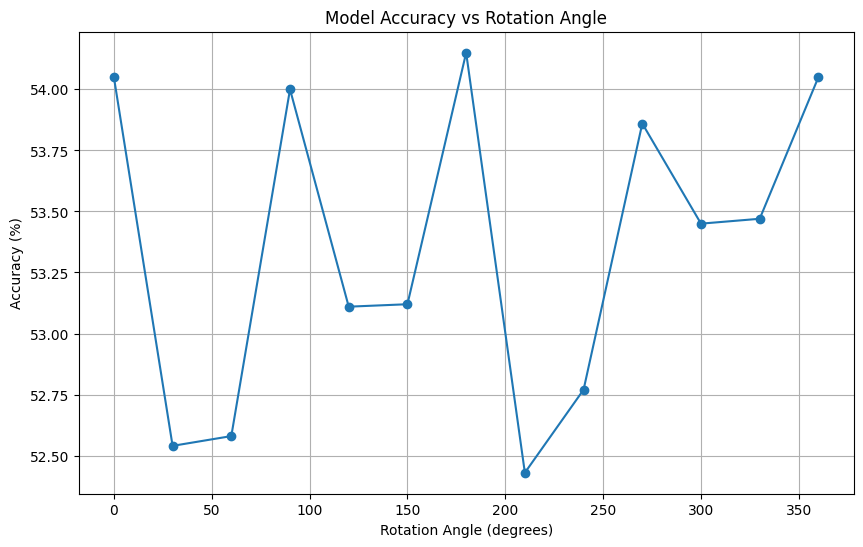

In [17]:
#######################
# PUT YOUR CODE HERE  #
#######################
rot_ang, rot_ang_acc = get_acc_per_angle(rot_inv_model)
plot(rot_ang, rot_ang_acc)


#######################
# END OF YOUR CODE    #
#######################

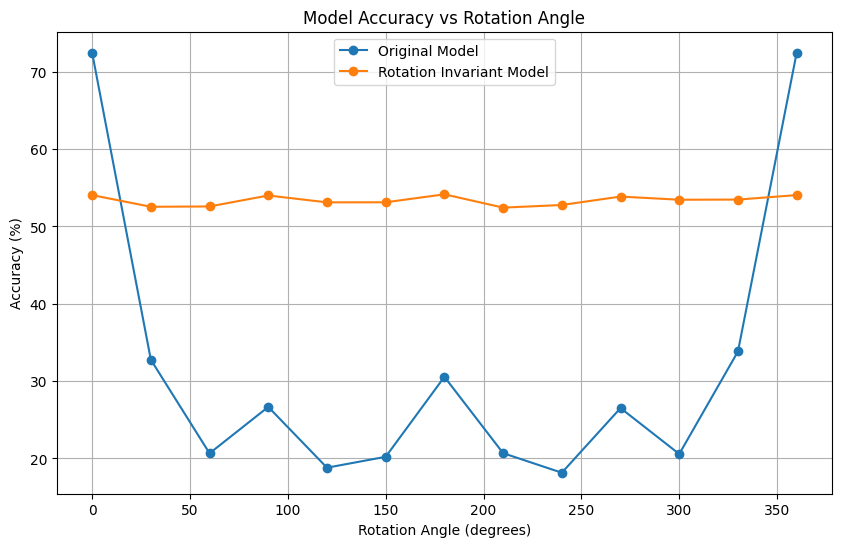

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(angles, angle_accuracies, marker='o')
plt.plot(rot_ang, rot_ang_acc, marker='o')
plt.legend(['Original Model', 'Rotation Invariant Model'])
plt.title('Model Accuracy vs Rotation Angle')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.show()